In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import os
import warnings

%matplotlib inline
pd.set_option("display.max_rows",None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
# plt.style.use('seaborn')

In [ ]:
df = pd.read_csv('train-data-final.csv')

In [ ]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,3,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,3,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,3,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,3,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,NaN,17.74


# Exploratory Data Analysis

In [ ]:
df.shape

(6024, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6024 entries, 0 to 6023
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6024 non-null   int64  
 1   Name               6024 non-null   object 
 2   Location           6024 non-null   object 
 3   Year               6024 non-null   int64  
 4   Kilometers_Driven  6024 non-null   int64  
 5   Fuel_Type          6024 non-null   object 
 6   Transmission       6024 non-null   object 
 7   Owner_Type         6024 non-null   int64  
 8   Mileage            6022 non-null   float64
 9   Engine             5988 non-null   float64
 10  Power              5988 non-null   float64
 11  Seats              5982 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6024 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 659.0+ KB


In [ ]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price
count,6024.000000,6024.000000,6.024000e+03,6024.000000,6022.000000,5988.000000,5988.000000,5982.000000,6024.000000
mean,3011.500000,2013.364210,5.870658e+04,2.797311,18.136820,1620.932031,111.213165,5.278502,9.478197
std,1739.123342,3.275215,9.123861e+04,0.456203,4.581682,601.248882,55.446259,0.808542,11.183847
min,0.000000,1998.000000,1.710000e+02,0.000000,0.000000,72.000000,0.000000,0.000000,0.440000
25%,1505.750000,2011.000000,3.400000e+04,3.000000,15.177500,1198.000000,74.000000,5.000000,3.500000
50%,3011.500000,2014.000000,5.300000e+04,3.000000,18.155000,1493.000000,92.700000,5.000000,5.640000
75%,4517.250000,2016.000000,7.300000e+04,3.000000,21.100000,1984.000000,138.100000,5.000000,9.952500
max,6023.000000,2022.000000,6.500000e+06,3.000000,33.540000,5998.000000,560.000000,10.000000,160.000000


In [ ]:
df.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5200
Price                   0
dtype: int64

# Data Preprocessing

In [ ]:
df.drop('Name', axis=1, inplace=True)

In [ ]:
df['Age'] = 2024 - df['Year']
df.drop('Year', axis=1, inplace=True)
df.drop('New_Price', axis=1, inplace=True)

In [ ]:
df.drop('Unnamed: 0', axis=1,inplace=True)

In [ ]:
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age
0,Mumbai,72000,CNG,Manual,3,26.60,998.0,58.16,5.0,1.75,14
1,Pune,41000,Diesel,Manual,3,19.67,1582.0,126.20,5.0,12.50,9
2,Chennai,46000,Petrol,Manual,3,18.20,1199.0,88.70,5.0,4.50,13
3,Chennai,87000,Diesel,Manual,3,20.77,1248.0,88.76,7.0,6.00,12
4,Coimbatore,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,17.74,11


In [ ]:
#Dropping rows with empty cells
df = df[df['Mileage'].notna()]
df = df[df['Engine'].notna()]
df = df[df['Power'].notna()]
df = df[df['Seats'].notna()]

In [ ]:
df.isna().sum()

Location             0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Age                  0
dtype: int64

In [ ]:
df.columns

Index(['Location', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'Age'],
      dtype='object')

In [ ]:
df.shape

(5980, 11)

In [ ]:
Location = df[['Location']]
Location = pd.get_dummies(Location)
Location.head()

,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True
2,False,False,True,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False


In [ ]:
Fuel_t = df[['Fuel_Type']]
Fuel_t = pd.get_dummies(Fuel_t)
Fuel_t.head()

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,True,False,False,False
1,False,True,False,False
2,False,False,False,True
3,False,True,False,False
4,False,True,False,False


In [ ]:
var = 'Transmission'
df[var].value_counts()

Transmission
Manual       4269
Automatic    1711
Name: count, dtype: int64

In [ ]:
Transmission = df[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

,Transmission_Manual
0,True
1,True
2,True
3,True
4,False


In [ ]:
df= pd.concat([df,Location,Fuel_t,Transmission],axis=1)
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,Mumbai,72000,CNG,Manual,3,26.60,998.0,58.16,5.0,1.75,14,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True
1,Pune,41000,Diesel,Manual,3,19.67,1582.0,126.20,5.0,12.50,9,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True
2,Chennai,46000,Petrol,Manual,3,18.20,1199.0,88.70,5.0,4.50,13,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True
3,Chennai,87000,Diesel,Manual,3,20.77,1248.0,88.76,7.0,6.00,12,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True
4,Coimbatore,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,17.74,11,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False


In [ ]:
df.drop(["Location","Fuel_Type","Transmission"],axis=1,inplace=True)
df.head()

,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Age,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,72000,3,26.60,998.0,58.16,5.0,1.75,14,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True
1,41000,3,19.67,1582.0,126.20,5.0,12.50,9,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True
2,46000,3,18.20,1199.0,88.70,5.0,4.50,13,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True
3,87000,3,20.77,1248.0,88.76,7.0,6.00,12,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True
4,40670,2,15.20,1968.0,140.80,5.0,17.74,11,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False


In [ ]:
df.shape

(5980, 24)

In [ ]:
df.columns

Index(['Kilometers_Driven', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price', 'Age', 'Location_Ahmedabad', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual'],
      dtype='object')

# Visualizing the data

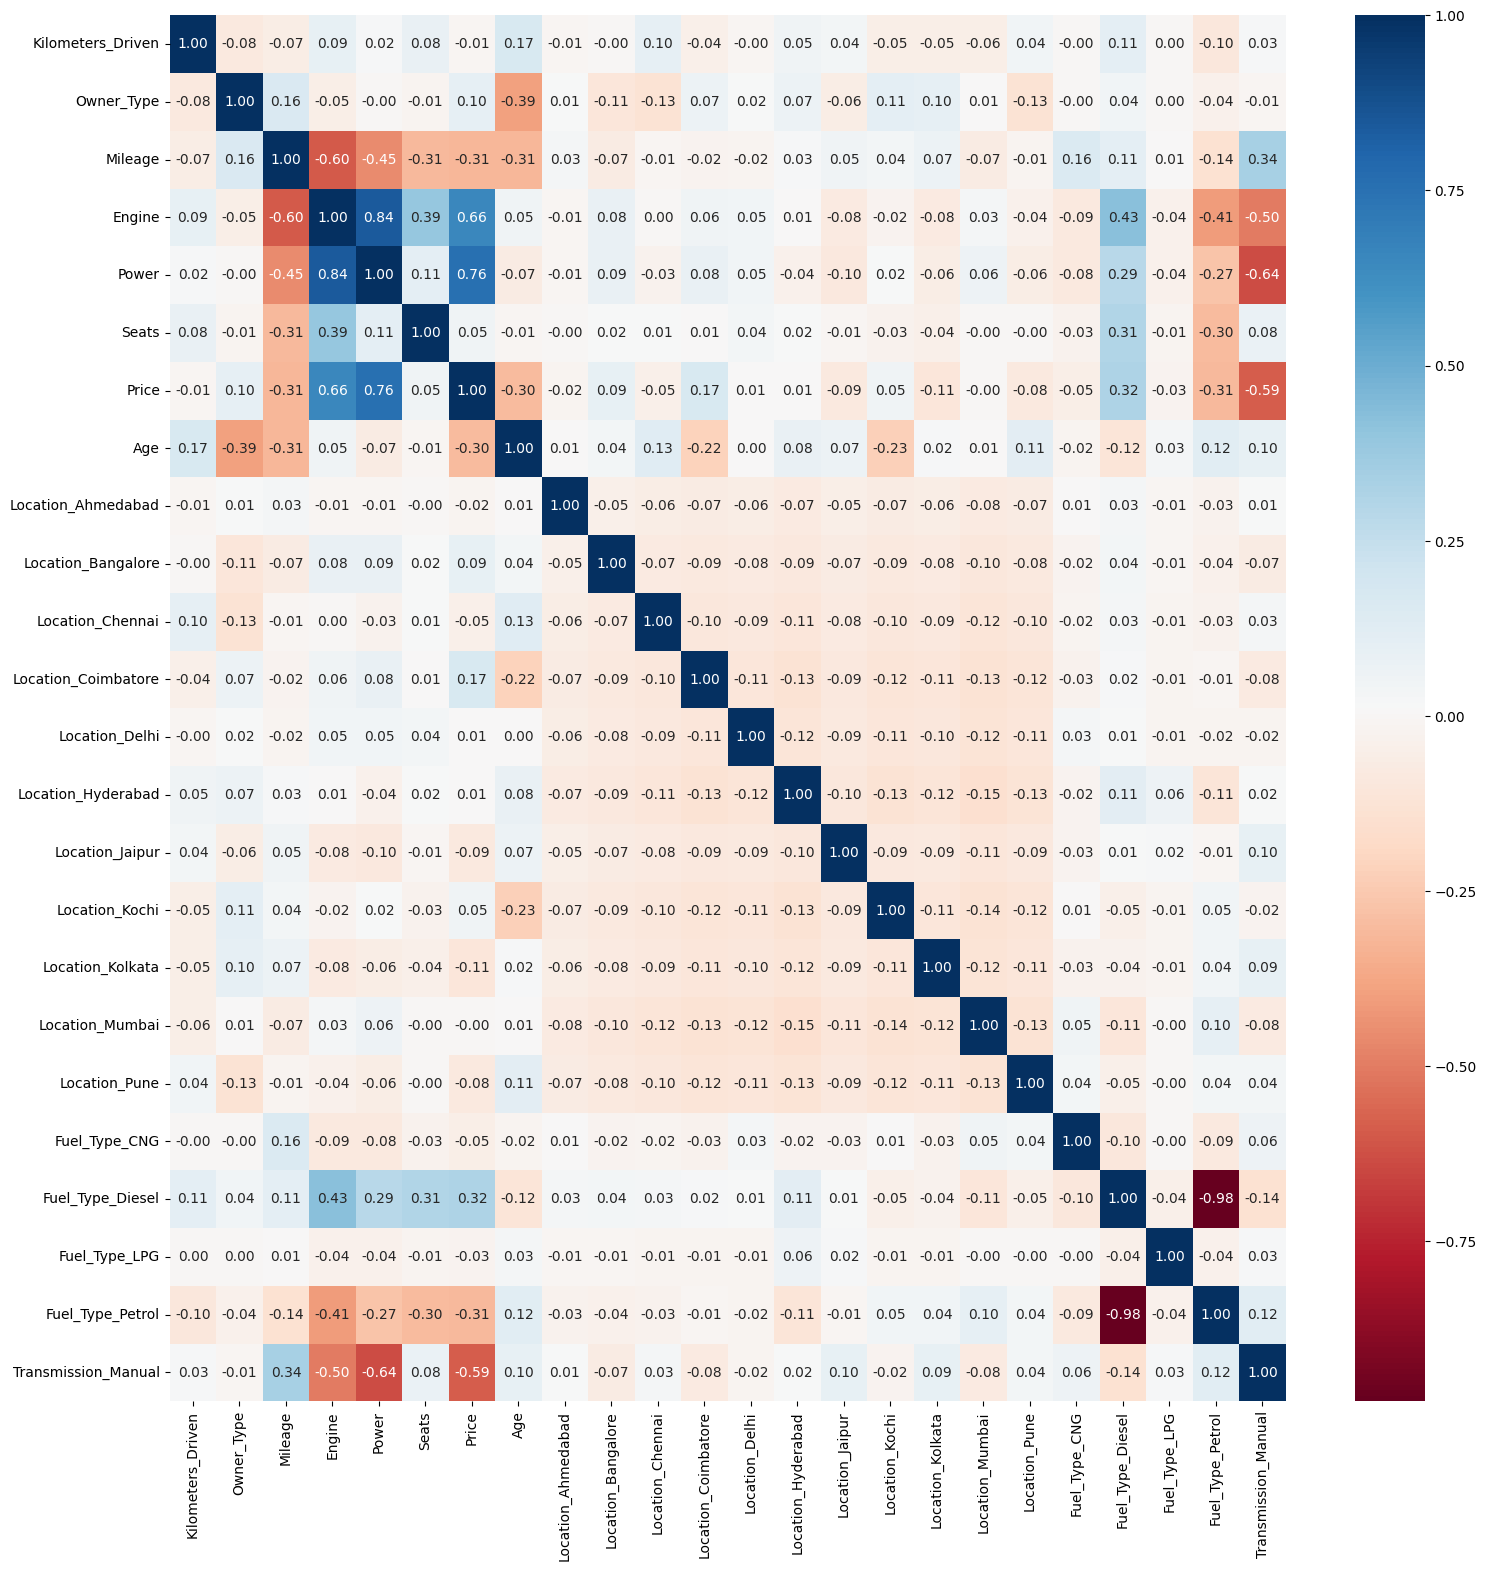

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot = True, cmap='RdBu',fmt=".2f")
plt.show()

In [ ]:
df.corr()['Price']

Kilometers_Driven     -0.011195
Owner_Type             0.096989
Mileage               -0.314001
Engine                 0.659079
Power                  0.759769
Seats                  0.052297
Price                  1.000000
Age                   -0.304886
Location_Ahmedabad    -0.017894
Location_Bangalore     0.088973
Location_Chennai      -0.045881
Location_Coimbatore    0.170882
Location_Delhi         0.006494
Location_Hyderabad     0.009454
Location_Jaipur       -0.088659
Location_Kochi         0.052687
Location_Kolkata      -0.106529
Location_Mumbai       -0.003261
Location_Pune         -0.082621
Fuel_Type_CNG         -0.051940
Fuel_Type_Diesel       0.319353
Fuel_Type_LPG         -0.025627
Fuel_Type_Petrol      -0.307768
Transmission_Manual   -0.585803
Name: Price, dtype: float64

In [ ]:
df.head()

,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Age,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,72000,3,26.60,998.0,58.16,5.0,1.75,14,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True
1,41000,3,19.67,1582.0,126.20,5.0,12.50,9,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True
2,46000,3,18.20,1199.0,88.70,5.0,4.50,13,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True
3,87000,3,20.77,1248.0,88.76,7.0,6.00,12,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True
4,40670,2,15.20,1968.0,140.80,5.0,17.74,11,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False


# Train - Test - Split

In [ ]:
# Train Test Split
X = df.loc[:,['Kilometers_Driven', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'Age', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol']]
y = df.loc[:,['Price']]

In [ ]:
print(X)

      Kilometers_Driven  Owner_Type  Mileage  Engine    Power  Seats  Age  \
0                 72000           3    26.60   998.0   58.160    5.0   14   
1                 41000           3    19.67  1582.0  126.200    5.0    9   
2                 46000           3    18.20  1199.0   88.700    5.0   13   
3                 87000           3    20.77  1248.0   88.760    7.0   12   
4                 40670           2    15.20  1968.0  140.800    5.0   11   
5                 75000           3    21.10   814.0   55.200    5.0   12   
6                 86999           3    23.08  1461.0   63.100    5.0   11   
7                 36000           3    11.36  2755.0  171.500    8.0    8   
8                 64430           3    20.54  1598.0  103.600    5.0   11   
9                 65932           2    22.30  1248.0   74.000    5.0   12   
10                25692           3    21.56  1462.0  103.250    5.0    6   
11                60000           3    16.80  1497.0  116.300    5.0   12   

In [ ]:
print(y)

       Price
0       1.75
1      12.50
2       4.50
3       6.00
4      17.74
5       2.35
6       3.50
7      17.50
8       5.20
9       1.95
10      9.95
11      4.49
12      5.60
13     27.00
14     17.50
15     15.00
16      5.40
17      5.99
18      6.34
19     28.00
20     18.55
21      8.25
22     23.50
23      1.87
24      2.85
25      4.25
26      4.25
27      2.75
28      9.90
29      4.00
30      7.75
31      6.75
32     12.50
33     11.50
34      6.98
35      1.85
36      8.63
37      4.85
38     28.00
39      5.00
40      1.25
41      1.53
42      5.58
43      4.74
44      8.85
45     10.11
46      4.25
47     10.95
48      3.85
49      5.50
50     21.43
51      4.25
52      3.30
53      3.85
54      3.60
55      3.99
56      3.30
57      2.07
58      7.75
59      2.25
60     16.50
61      2.75
62     26.70
63     10.00
64      2.50
65     13.50
66      1.85
67     35.67
68      8.15
69     10.50
70     14.50
71      9.65
72      3.48
73      6.92
74      6.46
75     29.50

In [ ]:
print(X.shape, y.shape)

(5980, 11) (5980, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=42)

In [ ]:
print(X_train)

      Kilometers_Driven  Owner_Type  Mileage  Engine    Power  Seats  Age  \
357               13747           3    14.67  1798.0  177.460    5.0    5   
254               83000           3    19.81  1086.0   68.050    5.0   14   
185               25000           3    19.98  1461.0  108.500    8.0    9   
3123              41195           3    15.00  1368.0   90.000    5.0   14   
3142              22000           3    18.50  1198.0   86.800    5.0    9   
2105              86000           3    22.74   796.0   47.300    5.0   11   
1604              89000           3    12.50  1991.0  147.900    7.0   15   
230              200000           2    17.20  1396.0   53.500    5.0   17   
2904              75000           3    11.00  2987.0  198.500    5.0   17   
4754              21652           3    22.74   796.0   47.300    5.0    9   
4748              16698           3    23.84  1199.0   84.000    5.0    5   
4097              40310           3    18.60  1197.0   81.830    5.0    8   

# Scaling the data for better training

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[-0.46025474  0.44188839 -0.78788173 ... -1.06738454 -0.04439843
   1.09173855]
 [ 0.24490345  0.44188839  0.35645897 ... -1.06738454 -0.04439843
   1.09173855]
 [-0.34567277  0.44188839  0.39430681 ...  0.93686948 -0.04439843
  -0.91597022]
 ...
 [-0.31512572  0.44188839 -0.26914363 ... -1.06738454 -0.04439843
   1.09173855]
 [-0.24433804  0.44188839  0.35645897 ... -1.06738454 -0.04439843
   1.09173855]
 [ 0.43836807  0.44188839 -0.20235332 ... -1.06738454 -0.04439843
   1.09173855]]


In [ ]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
r2_test = r2_score(y_test, y_pred)
print(r2_test)
data_frame = pd.DataFrame({'Actual Price': y_test.squeeze(), 'Predicted Price': y_pred.squeeze()})
print(data_frame)

0.6630561972932109
      Actual Price  Predicted Price
4111          2.55         1.952313
5051          1.65         1.514813
4871          6.95        11.921063
2817          7.10         7.296063
167           2.10         2.264813
4104         16.81        19.827313
6006         10.75        26.077313
3068          2.21         1.327313
3785         10.17        10.296063
3129          3.25         0.577313
4811          9.66        15.327313
2587          6.50         8.233563
1038         67.00        35.139813
4452         19.40        24.952313
4434          3.90         4.639813
5087          2.10         0.264813
3551          0.80        -1.485187
4860          2.65         0.514813
5504         18.75        20.233563
5790          8.50         7.952313
3871          4.25         7.639813
589          19.00        34.764813
1756          2.70        -2.828937
2944          2.70         4.733563
4626          6.90         8.171063
4090          6.50        12.671063
3944     

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(5980, 11) (5083, 11) (897, 11)


In [ ]:
print(y.shape, y_train.shape, y_test.shape)

(5980, 1) (5083, 1) (897, 1)


In [ ]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
r2_test = r2_score(y_test, y_pred)
print(r2_test)
data_frame = pd.DataFrame({'Actual Price': y_test.squeeze(), 'Predicted Price': y_pred.squeeze()})
print(data_frame)

0.916540042132748
      Actual Price  Predicted Price
4111          2.55         3.395800
5051          1.65         1.248600
4871          6.95         6.505400
2817          7.10         7.184200
167           2.10         2.069200
4104         16.81        19.526600
6006         10.75        12.973600
3068          2.21         1.739000
3785         10.17         7.006200
3129          3.25         3.399800
4811          9.66        12.973700
2587          6.50         6.209300
1038         67.00        40.407700
4452         19.40        20.465900
4434          3.90         4.556600
5087          2.10         3.618700
3551          0.80         1.754100
4860          2.65         2.685100
5504         18.75        21.098800
5790          8.50         9.950100
3871          4.25         5.377900
589          19.00        10.610700
1756          2.70         2.684600
2944          2.70         2.700400
4626          6.90         6.403200
4090          6.50         6.861600
3944      

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
rf = ExtraTreesRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
r2_test = r2_score(y_test, y_pred)
print(r2_test)
data_frame = pd.DataFrame({'Actual Price': y_test.squeeze(), 'Predicted Price': y_pred.squeeze()})
print(data_frame)

0.9115580943214064
      Actual Price  Predicted Price
4111          2.55         3.596400
5051          1.65         1.295100
4871          6.95         6.154800
2817          7.10         6.640900
167           2.10         1.861700
4104         16.81        17.962500
6006         10.75        12.960500
3068          2.21         1.459900
3785         10.17         6.825400
3129          3.25         3.505800
4811          9.66        11.580600
2587          6.50         5.996300
1038         67.00        41.874500
4452         19.40        19.640200
4434          3.90         3.827900
5087          2.10         3.544500
3551          0.80         1.841100
4860          2.65         2.653500
5504         18.75        21.268000
5790          8.50         9.767500
3871          4.25         5.007500
589          19.00        10.034800
1756          2.70         2.623400
2944          2.70         2.491500
4626          6.90         6.183400
4090          6.50         6.704500
3944     

In [ ]:
import xgboost as xgb
model = xgb.XGBRegressor(n_estimators=1000, tree_method='gpu_hist', eta=0.1, max_depth=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_test = r2_score(y_test,y_pred)
print(r2_test)
data_frame = pd.DataFrame({'Actual Price': y_test.squeeze(), 'Predicted Price': y_pred.squeeze()})
print(data_frame)

0.9313940879829262
      Actual Price  Predicted Price
4111          2.55         3.255747
5051          1.65         1.998342
4871          6.95         5.517242
2817          7.10         7.734567
167           2.10         1.829754
4104         16.81        18.160444
6006         10.75        10.854095
3068          2.21         2.669866
3785         10.17         7.950631
3129          3.25         3.943117
4811          9.66         9.041956
2587          6.50         5.553138
1038         67.00        51.089184
4452         19.40        21.026440
4434          3.90         4.267128
5087          2.10         3.146605
3551          0.80         0.791526
4860          2.65         2.877280
5504         18.75        19.984192
5790          8.50         8.556810
3871          4.25         5.700031
589          19.00        11.631556
1756          2.70         2.391693
2944          2.70         3.804193
4626          6.90         6.153475
4090          6.50         8.416046
3944     

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

		Error Table
Mean Absolute Error      :  1.531367394607867
Mean Squared  Error      :  8.32026902697512
Root Mean Squared  Error :  2.8844876541554343
R Squared Error          :  0.9313940879829262


In [ ]:
import xgboost as xgb
model = xgb.XGBRegressor(n_estimators=1000, tree_method='gpu_hist', eta=0.1, max_depth=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_test = r2_score(y_test,y_pred)
print(r2_test)
data_frame = pd.DataFrame({'Actual Price': y_test.squeeze(), 'Predicted Price': y_pred.squeeze()})
print(data_frame)

0.9313940879829262
      Actual Price  Predicted Price
4111          2.55         3.255747
5051          1.65         1.998342
4871          6.95         5.517242
2817          7.10         7.734567
167           2.10         1.829754
4104         16.81        18.160444
6006         10.75        10.854095
3068          2.21         2.669866
3785         10.17         7.950631
3129          3.25         3.943117
4811          9.66         9.041956
2587          6.50         5.553138
1038         67.00        51.089184
4452         19.40        21.026440
4434          3.90         4.267128
5087          2.10         3.146605
3551          0.80         0.791526
4860          2.65         2.877280
5504         18.75        19.984192
5790          8.50         8.556810
3871          4.25         5.700031
589          19.00        11.631556
1756          2.70         2.391693
2944          2.70         3.804193
4626          6.90         6.153475
4090          6.50         8.416046
3944     

In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
model = CatBoostRegressor(iterations=6000,
                          learning_rate=0.1,
                          depth=5,
                          loss_function='RMSE',
                          verbose=1000)
model.fit(X_train, y_train, eval_set=(X_test, y_test))
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2_test = r2_score(y_test,y_pred)
print("R-Squared value: ",r2_test)

0:	learn: 10.4543134	test: 10.2948609	best: 10.2948609 (0)	total: 154ms	remaining: 15m 25s
1000:	learn: 1.4628490	test: 2.6349176	best: 2.6340961 (989)	total: 1.46s	remaining: 7.29s
2000:	learn: 1.0794416	test: 2.6205337	best: 2.6097918 (1361)	total: 2.79s	remaining: 5.57s
3000:	learn: 0.8892057	test: 2.6423456	best: 2.6097918 (1361)	total: 4.06s	remaining: 4.06s
4000:	learn: 0.7672582	test: 2.6610185	best: 2.6097918 (1361)	total: 5.37s	remaining: 2.68s
5000:	learn: 0.6853205	test: 2.6755685	best: 2.6097918 (1361)	total: 6.68s	remaining: 1.33s
5999:	learn: 0.6218477	test: 2.6864866	best: 2.6097918 (1361)	total: 7.95s	remaining: 0us

bestTest = 2.609791775
bestIteration = 1361

Shrink model to first 1362 iterations.
Mean Squared Error: 6.811013111305996
R-Squared value:  0.943838863293189


In [ ]:
data_frame = pd.DataFrame({'Actual Price': y_test.squeeze(), 'Predicted Price': y_pred.squeeze()})
print(data_frame)

      Actual Price  Predicted Price
4111          2.55         3.085222
5051          1.65         1.879201
4871          6.95         5.337778
2817          7.10         7.700007
167           2.10         2.012698
4104         16.81        18.116500
6006         10.75        12.031276
3068          2.21         1.750047
3785         10.17         7.453895
3129          3.25         3.712192
4811          9.66         9.151325
2587          6.50         5.636299
1038         67.00        49.329348
4452         19.40        19.361906
4434          3.90         4.352406
5087          2.10         2.948731
3551          0.80         1.340141
4860          2.65         2.805229
5504         18.75        21.935755
5790          8.50         8.921630
3871          4.25         5.510656
589          19.00        13.559844
1756          2.70         2.270298
2944          2.70         3.224955
4626          6.90         6.114551
4090          6.50         7.238478
3944          3.00         3

In [ ]:
!jupyter nbconvert --to script --no-prompt final.ipynb

[NbConvertApp] Converting notebook final.ipynb to script
[NbConvertApp] Writing 5210 bytes to final.py
